# Linear Models for Classification: Wine Dataset

## IMPORTANT: make sure to rerun all the code from the beginning to obtain the results for the final version of your notebook (this is the way we will do it for evaluating your HWs!)

### Dataset description

We will be working with a dataset on wines from the UCI machine learning repository
(http://archive.ics.uci.edu/ml/datasets/Wine). It contains data for 178 instances. 
The dataset is the results of a chemical analysis of wines grown in the same region
in Italy but derived from three different cultivars. The analysis determined the
quantities of 13 constituents found in each of the three types of wines. 

### The features in the dataset are:

- Alcohol
- Malic acid
- Ash
- Alcalinity of ash
- Magnesium
- Total phenols
- Flavanoids
- Nonflavanoid phenols
- Proanthocyanins
- Color intensity
- Hue
- OD280/OD315 of diluted wines
-Proline



Hence, the task is to perform a <u>classification</u> to decide from which cultivar the given wine has been grown

We first import the dataset we are going to use.

In [1]:
# -- let's import the sklearn library
import sklearn

# -- let's print out the version of scikit-learn
print(sklearn.__version__)

# -- this imports the datasets module, which has useful datasets
from sklearn import datasets

# -- Load the dataset from scikit learn
wine = datasets.load_wine()

1.5.2


Let's check out the description of the dataset from the scikit learn documentation: https://scikit-learn.org/0.23/modules/classes.html#module-sklearn.datasets

(**Note**: we are considering the scikit-learn version that is installed in the labs Te and Ue, but there are more recent ones)

Now let's understand a little bit the data.

In [2]:
# -- let's print the dimension of the data matrix
print('Wine dataset shape:\n', wine.data.shape)

# -- let's print the features names
print('Feature names:\n', wine.feature_names)

# -- let's print the data matrix
print('Data:\n', wine.data)

# -- let's print the targets names
print('Target names:\n', wine.target_names)

# --let's print the target (labels)
print('Labels:\n', wine.target)

# -- let's print the description of the dataset
print('Dataset description:\n', wine.DESCR)

Wine dataset shape:
 (178, 13)
Feature names:
 ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Data:
 [[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
Target names:
 ['class_0' 'class_1' 'class_2']
Labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 

There are three different classes of cultivars (represented with labels 0, 1, and 2).

To simplify a bit the problem (and the presentation), we are going to consider a **binary classification** task. In particular, we are going to classify class "1" vs the other two classes (0 and 2), that we denote as "-1". 

Thus, we need to re-label the other classes (0 and 2) as "-1".

For convenience, let's save the instances (vectors of features) in matrix $\mathbf{X}$ and the targets into a vector $\mathbf{Y}$.

In [3]:
X = wine.data
Y = wine.target

# -- let's print out the matrix of instances and the vector of targets, just to make sure that everything looks ok
print("Matrix of instances:")
print(X)

print("Vector of labels:")
print(Y)

Matrix of instances:
[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
Vector of labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


Let's relabel the labels for classes 0 and 2 as stated before.

In [4]:
# -- let's relabel classes 0 and 2 as -1

for i in range(len(Y)):
    if Y[i] != 1:
        Y[i] = -1
        
# -- let's print the new vector Y
print('Re-labeled classes:')
print(Y)

Re-labeled classes:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


## Data Preprocessing and Split into Training and Testing ##

Before we actually learn the model, it is important that we perform two operations:
1. split the data into a training set and a test set
2. normalize the features

**Note**: some of there operations can be done in few lines with scikit-learn dedicated functions, but we do them "manually" to get a better understanding of what is going on.

*1) Train and Test split:*

We now want to split the data into train and test. Let's say we keep 50% of the data for training and 50% for testing. How do we split the data?

What about keeping the first 50% of the raws for training and the last 50% of rows for testing? Is it a good idea?

Solution: randomly permute the rows, and then split as suggested before.

**Note**: since we use randomization in some parts, let's fix a random seed (so that the entire procedure is reproducible, hopefully).

In [5]:
# -- we need to import numpy
import numpy as np
import matplotlib.pyplot as plt

# -- set the random seed to your ID number
IDnumber = 1
np.random.seed(IDnumber)

# -- let's generate a permutation among the number of rows
# -- TO COMPLETE
m = wine.data.shape[0]
permutation = np.random.permutation(m)

# -- visualize what permutation does
print('Permutation of indexes:\n', permutation)

# -- TO COMPLETE
X_perm = X[permutation]
Y_perm = Y[permutation]

#let's print Y_perm
print('Permutation of targets:\n', Y_perm)

Permutation of indexes:
 [161 117  19  69  53 138 112  14 160 107  11   4 108  42  84 113 152  35
 105  31  51 126 130  73  40 162  47  29  16 147  97 159 151   5 120  94
  91  81 114  48  54  59 165  39  56  44  78  33  18  58 127 172 148  12
  90  95  28 124 135  66 123  17 164  89 170  13 106  45  93  36 171 166
 168 175 118  75  21 173   2  70 163   6  85   0 136  77  65  55  99  88
 102  46  62  74  92 176 116 119 125 110  10  34  32 145  38  83 154 177
  27 100  23 103  67   9 150 104 122 132 153  87  98 111 167 158  64  15
  82  41 143 109  80  52  26  76  43  24   3 149  49 131 169  30 121 115
 155   8  60 128   1  57  22  61  63   7 174 141  86  96  68  50 142 157
 156 139 146 101  20  25 134  71 129 144  79 133 137  72 140  37]
Permutation of targets:
 [-1  1 -1  1 -1 -1  1 -1 -1  1 -1 -1  1 -1  1  1 -1 -1  1 -1 -1  1 -1  1
 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1  1  1  1  1 -1 -1  1 -1 -1 -1 -1  1 -1
 -1 -1  1 -1 -1 -1  1  1 -1  1 -1  1  1 -1 -1  1 -1 -1  1 -1  1 -1 -1 -1
 -1 -1  

Let's split the data and save into 2 new data matrices/vectors.

In [6]:
# -- train-test split: 50% training, 50% test
m = X_perm.shape[0]
fraction_train = 0.5

m_train = int(m*fraction_train)
print('Number of samples in training set:', m_train)

m_test = m - m_train
print('Number of samples in test set:', m_test)

Number of samples in training set: 89
Number of samples in test set: 89


In [7]:
# -- let's assign the train and test samples 
# -- TO COMPLETE
X_train = X_perm[:m_train,:]
Y_train = Y_perm[:m_train]

X_test = X_perm[m_train:,]
Y_test = Y_perm[m_train:]

print('Y training:', Y_train)

Y training: [-1  1 -1  1 -1 -1  1 -1 -1  1 -1 -1  1 -1  1  1 -1 -1  1 -1 -1  1 -1  1
 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1  1  1  1  1 -1 -1  1 -1 -1 -1 -1  1 -1
 -1 -1  1 -1 -1 -1  1  1 -1  1 -1  1  1 -1 -1  1 -1 -1  1 -1  1 -1 -1 -1
 -1 -1  1  1 -1 -1 -1  1 -1 -1  1 -1 -1  1  1 -1  1]


*2) Features Normalization:*

We now center and scale the data to have zero mean and unit variance. This is an important step for the stability of the computation and for other reasons. We are going to use the standard scaler from scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [8]:
# -- load the StandardScaler module
from sklearn.preprocessing import StandardScaler

# -- we first "learn" the scaler function using the training data
# -- TO COMPLETE
scaler = StandardScaler().fit(X_train)

# -- we then apply the scaling function to both training and test data, since we want to simulate what happens 
# -- when we have data for training and we have future data
# -- TO COMPLETE
X_train_scaled = scaler.transform(X_train)
X_test_scaled =  scaler.transform(X_test)

# -- let's print the scaled version of X_traing_scaled
print('X_train scaled:\n', X_train_scaled)

X_train scaled:
 [[ 0.75978906  0.90435899  0.63672355 ...  0.02998213 -1.19559091
  -0.25927744]
 [-0.77075732 -0.63309317 -0.71528317 ...  0.49486179  0.45548645
  -1.26662133]
 [ 0.69953133  0.75527272  0.71398107 ...  0.02998213  1.03481184
   0.23687701]
 ...
 [-0.83101506 -1.00580884  0.71398107 ...  1.09920535 -0.50040044
  -0.26529144]
 [ 0.60311896 -0.52127847  0.32769344 ...  0.12295806  0.55686839
   1.06380109]
 [-0.92742743  0.82049796 -0.63802564 ...  2.16842857  0.2672057
  -1.08319453]]


Alternatively, let's perform the same operation manually, without using the StandardScaler module

In [9]:
# -- let's compute the mean of each feature in the training data
X_means = np.mean(X_train, axis=0)
print('Means of X_train:\n', X_means)
print('\n')

# -- let's compute the standard deviation of each feature in the training data
X_stds = np.std(X_train, axis=0)
print('Standard deviations of X_train:\n', X_stds)
print('\n')

# -- let's scale the data by hand
X_train_scaled_byhand = (X_train - X_means)/X_stds
X_test_scaled_byhand = (X_test - X_means)/X_stds

# -- print the scaled version of X_train
print('X_train scaled by hand:\n', X_train_scaled_byhand)

Means of X_train:
 [1.30595506e+01 2.28943820e+00 2.37516854e+00 1.89651685e+01
 1.01651685e+02 2.31966292e+00 2.10921348e+00 3.58089888e-01
 1.68786517e+00 5.20955055e+00 9.53550562e-01 2.64550562e+00
 7.66224719e+02]


Standard deviations of X_train:
 [8.29769035e-01 1.07320413e+00 2.58874454e-01 3.24688619e+00
 1.62668071e+01 6.25440877e-01 9.97925066e-01 1.19670675e-01
 5.88945872e-01 2.26148547e+00 2.15109432e-01 6.90458261e-01
 3.32557734e+02]


X_train scaled by hand:
 [[ 0.75978906  0.90435899  0.63672355 ...  0.02998213 -1.19559091
  -0.25927744]
 [-0.77075732 -0.63309317 -0.71528317 ...  0.49486179  0.45548645
  -1.26662133]
 [ 0.69953133  0.75527272  0.71398107 ...  0.02998213  1.03481184
   0.23687701]
 ...
 [-0.83101506 -1.00580884  0.71398107 ...  1.09920535 -0.50040044
  -0.26529144]
 [ 0.60311896 -0.52127847  0.32769344 ...  0.12295806  0.55686839
   1.06380109]
 [-0.92742743  0.82049796 -0.63802564 ...  2.16842857  0.2672057
  -1.08319453]]


The values correspond to those seen above obtained with the scaler

Let's check if the scaler did his job  

In [10]:
print('X_train mean:\n', np.mean(X_train_scaled, axis=0))
print('\n')
print('X_train std:\n', np.std(X_train_scaled, axis=0))

X_train mean:
 [-2.38510834e-15 -5.61348720e-17  2.06077352e-15  1.61481315e-15
 -3.36809232e-16  1.36345367e-15 -1.04909839e-15 -2.00838098e-16
 -6.83597997e-16  2.46993437e-16  7.23516128e-16 -8.80070049e-16
  3.74232480e-17]


X_train std:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [11]:
print('X_test mean:\n', np.mean(X_test_scaled, axis=0))
print('\n')
print('X_test std:\n', np.std(X_test_scaled, axis=0))

X_test mean:
 [-0.14204575  0.08742067 -0.06684078  0.32632821 -0.23484785 -0.07850642
 -0.16022009  0.06290672 -0.32928762 -0.13394795  0.03625017 -0.09796457
 -0.11625928]


X_test std:
 [0.94530282 1.07290981 1.10964721 1.02502292 0.71104031 0.99412865
 0.98977359 1.07187905 0.90780157 1.03968689 1.11571535 1.04789128
 0.88119444]


## Learning a Model ##

We now need to decide which model/algorithm we are going to use for our classification task. There are several models available in scikit-learn: https://scikit-learn.org/0.23/index.html

We are going to start from the simplest models, that is, linear models: https://scikit-learn.org/0.23/modules/classes.html#module-sklearn.linear_model

How do we find the best hypothesis?

We need to define a loss function and then use Empirical Risk Minimization (ERM). 

What loss function does it make sense to use?

But what is the actual algorithm? We are going to consider the **Perceptron** algorithm: https://scikit-learn.org/0.23/modules/generated/sklearn.linear_model.Perceptron.html

Let's load the corresponding module in scikit-learn

In [12]:
from sklearn.linear_model import Perceptron

Let's us the Perceptron algorithm as implemented in scikit-learn. It proceeds in iterations.

The Perceptron has several parameters, some of which we will understand later on. An important one is $\texttt{tol}$, that represents how much the training error should improve in one iteration for the algorithm to continue.

In [13]:
#let's learn a model using Perceptron

# -- we first define the classifier, fixing the random state for reproducibility
perceptron = Perceptron(random_state = IDnumber, tol=1e-3)

# -- let's now learn the classifier (i.e., run the perceptron to fix the weights)
perceptron.fit(X_train_scaled, Y_train)

Perceptron(random_state=1)

Let's print out the model we learned.

In [14]:
print("Coefficient of features in the model we learned:")
# -- TO COMPLETE
print(perceptron.coef_)

print("Bias in the model we learned:")
# -- TO COMPLETE
print(perceptron.intercept_)

Coefficient of features in the model we learned:
[[-4.96848696 -1.74558664 -4.09074263  4.03186637 -1.72682244  0.3485182
   2.99148804 -0.34645642  2.28746151 -6.78434457  3.53914454  1.1485614
  -6.59931033]]
Bias in the model we learned:
[-6.]


How well does our method perform?

We need to compute the training error of the hypothesis $h_S$ we learned from the training set $S$. There is no function in scikit-learn to compute the training error $L_S(h_S)$. However, there is a function to compute the **score**, that for the 0-1 loss corresponds to $1 - L_S(h_S)$.

In [15]:
# -- let's compute the training error
training_error = 1.0 - perceptron.score(X_train_scaled, Y_train)

# -- let's print the training error
print("Training error: ", training_error)

Training error:  0.0


But we don't care about the training error... we are interested in the generalization error! How do we estimate it? Let's use some data that we did not use for training, that is what we called test data.

In [16]:
# -- let's compute the test error
test_error = 1.0 - perceptron.score(X_test_scaled, Y_test)

# -- let's print the test error
print("Test error: ", test_error)

Test error:  0.0449438202247191


## Impact of the amount of training data ##

We will now try to understand the impact of the amount of data we have for training.

To do this, we are going to train a model using a subset of the data with $10*i$ samples, for $i=1,2,3,\dots,10$, and then compute the training error and the test error.

In [17]:
def compute_errors(X, Y, n_samples):

    # -- total number of samples, useful for later on
    m_total = X.shape[0]
    
    # -- two lists where to save the training error and the test error, useful for plotting
    train_errors = list()
    test_errors = list()
    
    # -- let's define the learner we use in this part
    perceptron = Perceptron(random_state = IDnumber, tol=1e-3)
    
    for idx_iter in range(10, n_samples + 1):
        # -- we now repeat all the previous steps
        # -- split into training and test
        m_training = idx_iter
        
        X_train = X[:m_training,:]
        Y_train = Y[:m_training]
    
        X_test = X[m_training:,]
        Y_test = Y[m_training:]
        
        # -- scale the data according to the training test, for both training and testing
        scaler = StandardScaler().fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_test_scaled =  scaler.transform(X_test)
        
        # -- let's now learn the classifier (i.e., run the perceptron to fix the weights)
        perceptron.fit(X_train_scaled, Y_train)
        
        train_errors.append(1.0 - perceptron.score(X_train_scaled, Y_train))
        test_errors.append(1.0 - perceptron.score(X_test_scaled, Y_test))

    return train_errors, test_errors


In [18]:
def plot_errors(X, Y, n_samples):
    train_errors, test_errors = compute_errors(X, Y, n_samples)
    
    sample_range = list(range(10, n_samples + 1))
    
    plt.plot(sample_range, train_errors, 'x:', markevery= n_samples // 10)
    plt.plot(sample_range, test_errors, 'o--', markevery= n_samples // 10)
    
    plt.xlabel("Number of samples")
    plt.ylabel("Error")
    plt.legend(["Training error","Test error"])
    plt.show()

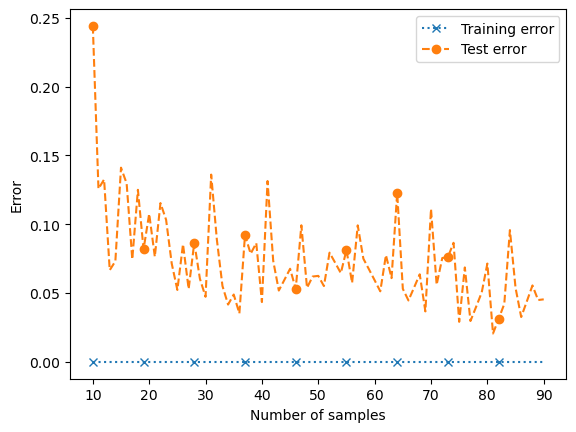

In [19]:
n_samples = 90
plot_errors(X_perm, Y_perm, n_samples)

Now let's plot the training and test error as a function of the training dataset size.

## Impact of random_state by the perceptron 

Let's learn a model with a different random seed for the Perceptron and see how different the model is from the previous one.

In [20]:
#let's learn a new model using Perceptron

# -- we first define the classifier, fixing the random state for reproducibility
old_perceptron = Perceptron(random_state = 1*IDnumber, tol=1e-3)
new_perceptron = Perceptron(random_state = 2*IDnumber, tol=1e-3)

# --let's now learn the classifier (i.e., run the perceptron to fix the weights)
old_perceptron.fit(X_train_scaled, Y_train)
new_perceptron.fit(X_train_scaled, Y_train)


# -- let's print the training error
print("Training error of old perceptron: ", 1.0 - old_perceptron.score(X_train_scaled, Y_train))
print("Training error of new perceptron: ", 1.0 - new_perceptron.score(X_train_scaled, Y_train))

# -- let's print the test error
print("Test error of old perceptron: ", 1.0 - old_perceptron.score(X_test_scaled, Y_test))
print("Test error of new perceptron: ", 1.0 - new_perceptron.score(X_test_scaled, Y_test))

Training error of old perceptron:  0.0
Training error of new perceptron:  0.0
Test error of old perceptron:  0.0449438202247191
Test error of new perceptron:  0.0674157303370787


In [21]:
def plot_model_parameters(old_perceptron, new_perceptron):
    
    # -- let's plot the parameters of the two different models
    
    fig, axs = plt.subplots(1, 1)
    
    axs.bar(x = range(0, 42, 3), height = np.append(old_perceptron.coef_[0], old_perceptron.intercept_), 
            color='C0', edgecolor='k', linewidth=.5);
    axs.bar(x = range(1, 42, 3), height = np.append(new_perceptron.coef_[0], new_perceptron.intercept_), 
            color='C1', edgecolor='k',  linewidth=.5);
    bars = {'OLD Perceptron parameters' : 'C0', 'NEW Perceptron parameters' : 'C1'}
    labels = bars.keys()
    handles = [plt.Rectangle((0,0),1,1, color=bars[label], ec='k') for label in labels]
    axs.axhline(y = 0, color='k', linewidth=0.25);
    
    axs.legend(handles, labels, loc='best', frameon=False)
    
    # -- axis labels
    axs.set_xlabel('Parameter (weights and bias)', fontsize=14)
    axs.set_ylabel('Value',  fontsize=14)
    # -- ticks
    axs.set_xticks([0.5 + 3*i for i in range(14)]);
    xlabels = [f'$w_{ {i+1} }$' for i in range(13)];
    xlabels.append('$b$')
    axs.set_xticklabels(xlabels);
    axs.tick_params(axis='y', labelsize=14)
    axs.tick_params(axis='x', labelsize=11)


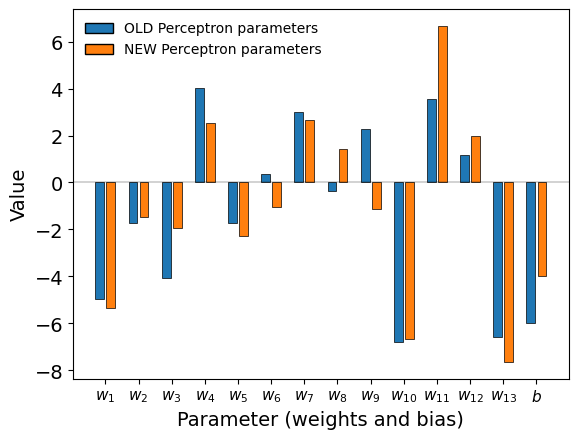

In [22]:
plot_model_parameters(old_perceptron, new_perceptron)

In [23]:
# -- the following is to show that, besides the different parameters, the models will also perform differently on classification task.
# -- try both for X_train_scaled and X_test_scaled

w_1 = old_perceptron.coef_
b_1 = old_perceptron.intercept_
w_2 = new_perceptron.coef_
b_2 = new_perceptron.intercept_

# for each sample in the test set, print out the prediction of both models when they disagree and the index of the sample
for i in range(X_test_scaled.shape[0]):
    sample = X_test_scaled[i, :]
    pred_1 = np.dot(w_1, sample) + b_1
    pred_2 = np.dot(w_2, sample) + b_2
    if pred_1[0] * pred_2[0] < 0:
        print('# Sample index', i)
        print('--> Prediction of first model = ', int(np.sign(pred_1)[0]))
        print('--> Predicion of second model =  ', int(np.sign(pred_2)[0]))

# -- you can see that for training set there are no such misclassified samples (indeed, they both have training error = 0.0)

# Sample index 13
--> Prediction of first model =  -1
--> Predicion of second model =   1
# Sample index 15
--> Prediction of first model =  -1
--> Predicion of second model =   1
# Sample index 16
--> Prediction of first model =  -1
--> Predicion of second model =   1
# Sample index 21
--> Prediction of first model =  -1
--> Predicion of second model =   1
# Sample index 62
--> Prediction of first model =  -1
--> Predicion of second model =   1
# Sample index 69
--> Prediction of first model =  -1
--> Predicion of second model =   1
# Sample index 74
--> Prediction of first model =  -1
--> Predicion of second model =   1
# Sample index 78
--> Prediction of first model =  -1
--> Predicion of second model =   1


## Impact of normalization

Let's try to understand what the impact of scaling data is. Let's learn a model without without normalizing the data.

In [24]:
# -- let's learn a new model using Perceptron

# -- we first define the classifier, fixing the random state for reproducibility
perceptron_not_scaled = Perceptron(random_state = IDnumber, tol=1e-3)
# -- let's now learn the classifier (i.e., run the perceptron to fix the weights)
perceptron_not_scaled.fit(X_train, Y_train)

# -- let's print the training error
print(f'Training error (not-scaled model): {1.0 - perceptron_not_scaled.score(X_train, Y_train)}')
print(f'Training error (scaled model):     {1.0 - old_perceptron.score(X_train_scaled, Y_train)}')

print('---')

# -- let's print the test error
print(f'Test error (not-scaled model): {1.0 - perceptron_not_scaled.score(X_test, Y_test)}')
print(f'Test error (scaled model):     {1.0 - old_perceptron.score(X_test_scaled, Y_test)}')

print('---')

# -- let's print out the features of the model we just learned
print("NEW MODEL - Coefficients of features:")
print(perceptron_not_scaled.coef_)
print("PREVIOUS MODEL - Coefficients of features:")
print(old_perceptron.coef_)

print("NEW MODEL - Bias:", perceptron_not_scaled.intercept_)
print("PREVIOUS MODEL - Bias:", old_perceptron.intercept_)

Training error (not-scaled model): 0.2134831460674157
Training error (scaled model):     0.0
---
Test error (not-scaled model): 0.3033707865168539
Test error (scaled model):     0.0449438202247191
---
NEW MODEL - Coefficients of features:
[[ 614.04      -21.94      102.53     1216.3      5211.        138.85
   183.85       21.82      175.95     -439.459994  107.886     265.98
  -841.      ]]
PREVIOUS MODEL - Coefficients of features:
[[-4.96848696 -1.74558664 -4.09074263  4.03186637 -1.72682244  0.3485182
   2.99148804 -0.34645642  2.28746151 -6.78434457  3.53914454  1.1485614
  -6.59931033]]
NEW MODEL - Bias: [65.]
PREVIOUS MODEL - Bias: [-6.]


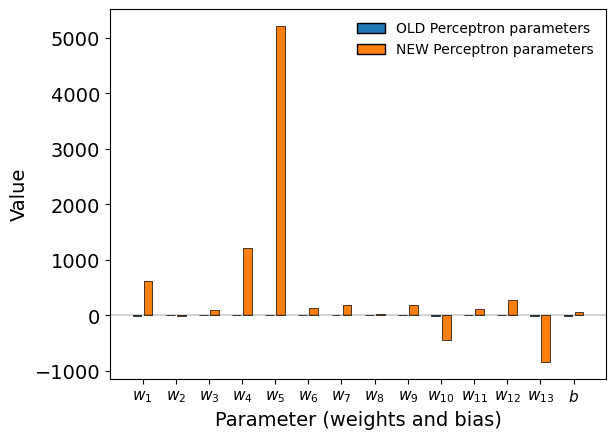

In [25]:
plot_model_parameters(old_perceptron, perceptron_not_scaled)

## Impact of number of iterations

Let's write the code that performs one epoch at the time, and let' compute the training error after iteration.

# Iteration 01 - Training error: 0.0561797752808989
# Iteration 01 - Test error: 0.0898876404494382
# Iteration 02 - Training error: 0.0337078651685393
# Iteration 02 - Test error: 0.1235955056179775
# Iteration 03 - Training error: 0.011235955056179803
# Iteration 03 - Test error: 0.0561797752808989
# Iteration 04 - Training error: 0.0337078651685393
# Iteration 04 - Test error: 0.0449438202247191
# Iteration 05 - Training error: 0.0
# Iteration 05 - Test error: 0.0561797752808989
# Iteration 06 - Training error: 0.0
# Iteration 06 - Test error: 0.0561797752808989
# Iteration 07 - Training error: 0.0
# Iteration 07 - Test error: 0.0561797752808989
# Iteration 08 - Training error: 0.0
# Iteration 08 - Test error: 0.0561797752808989
# Iteration 09 - Training error: 0.0
# Iteration 09 - Test error: 0.0561797752808989
# Iteration 10 - Training error: 0.0
# Iteration 10 - Test error: 0.0561797752808989


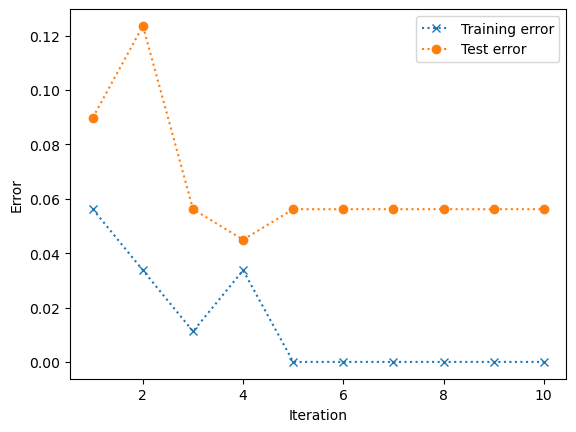

In [26]:
# -- we first define the classifier, fixing the random state for reproducibility
# -- the following results in the test error being smaller when the training error is !=0, and training NOT monotonic
perceptron_single_iter = Perceptron(random_state = 167*IDnumber)

# -- let's now run 1 iteration of perceptron
# -- see documentation for partial fit (uses max_iter = 1 = epoch)
perceptron_single_iter.partial_fit(X_train_scaled, Y_train, classes = Y_train)

# -- let's compute the training error
training_error = 1.0 - perceptron_single_iter.score(X_train_scaled, Y_train)
# -- let's print the training error
print(f"# Iteration {1:02d} - Training error:", training_error)
# -- let's compute the test error
test_error = 1.0 - perceptron_single_iter.score(X_test_scaled, Y_test)
# -- let's print the test error
print(f"# Iteration {1:02d} - Test error:", test_error)

# -- let's store the training error and the test error across interations so that we can plot them later on
training_error_iters = list()
training_error_iters.append(training_error)
test_error_iters = list()
test_error_iters.append(test_error)

# -- let's run for more iterations
for i in range(2, 11):
    
    # -- each time we are providing the model with one additional epoch
    perceptron_single_iter.partial_fit(X_train_scaled, Y_train, classes = Y_train)
    
    # -- let's compute the training error
    training_error = 1.0 - perceptron_single_iter.score(X_train_scaled, Y_train)
    # -- let's print the training errors
    print(f"# Iteration {i:02d} - Training error:", training_error)
    # -- store training errors
    training_error_iters.append(training_error)

    # -- let's compute the test error
    test_error = 1.0 - perceptron_single_iter.score(X_test_scaled, Y_test)
    # -- let's print the training error
    print(f"# Iteration {i:02d} - Test error:", test_error)
    # -- store test errors
    test_error_iters.append(test_error)
    
#let's plot the training error and the test errors across interations
x_axis=range(1, len(training_error_iters)+1, 1)
plt.plot(x_axis, training_error_iters,'x:');
# plt.legend(["Traninig error"])
plt.plot(x_axis, test_error_iters,'o:');
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.legend(["Training error","Test error"]);